# Aprendizagem Automatica 2022/2023
## First Home Assignment

**Team:**

- Ana Araújo
- Francisco Frazão
- Pedro Almeida

**Content Table:**\
\
[Introduction](#section1)\
\
[1. Regression Models](#section2)
- 1.1 Decision Tree Regressor
- 1.2 Regression
    - 1.2.1 Linear Regression
    - 1.2.2 Ridge Regression
    - 1.2.3 Lasso
- 1.3 Model Selection\

[2. Classification Models](#section3)
- 2.1 Decision Tree Classifier
- 2.2 Logistic Regression

<a id='section1'></a>
## Introduction:
Two goals were established for this first project: creating a regression model and a classification model. For both, the aim was to achieve the best model for a specific variable we wanted to predict, the motor_UPDRS for objective 1 and total_UPDRS for objective 2. 
The motor_UPDRS and the total_UPDRS were not used as independent variables in the model because of their strong correlation. The variable named subject# was removed from the dataset because it only has an ID number correlation. These models would be created for individual people and produce unreliable good outcomes if the variable #subjects were included in the models.


**Import Libraries:**

In [1]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split, cross_validate, KFold, ParameterGrid
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, explained_variance_score, mean_squared_error, mean_absolute_error,accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean, absolute, sqrt
from scipy.stats import pearsonr
from sklearn import tree
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import StandardScaler

C:\Users\arauj\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\arauj\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\arauj\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


**Import Data:**

In [2]:
df = pd.read_csv("parkinsons_updrs.data")

In [3]:
df = df.drop(columns = ['total_UPDRS','subject#'])

In [4]:
X = df.drop(columns=["motor_UPDRS"])
y = df["motor_UPDRS"]

#### Split into training, test and independent validation set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
X_train, X_IVS, y_train, y_IVS = train_test_split(X_train, y_train, test_size=0.33, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(X_IVS.shape)

(2637, 19)
(1939, 19)
(1299, 19)


<a id='section2'></a>
## 1. 1. Regression Models
To evaluate regressions we can use:
- person correlation between of predictions(preds) and truth(y_test)
- maximum error
- mean absolut error(mae) correlated with rmse but with more insights

For regression models, four models were used: Decision Tree Regressor, Linear Regression, Ridge Regression and Lasso Regression. 
To verify which model is more suitable, the following estimators were calculated: 
- maximum error
- Mean Absolute Error (MAE)
- Ratio of the Variance Explained (RVE)
- Root Mean Squared Error (RMSE)
- Pearson Correlation between of predictions(preds) and truth(y_test). 

All models were evaluated through a 10 splits K-Fold Cross Validation.

Changes were performed  in order to tune the models’s hyperparameters and, thus, obtain the best results.


### 1.1 Decision Tree Regressor

For decision tree regressor some hyperparameters were tuned such as the max depth, the min samples leaf and min samples split. A minimum of samples leaves equal to 1 should not be used as it can induce unreliable results when testing, since it can overfit. 

Then, to assess the best configuration of the hyperparameters, several values were tested, using a for loop to run through them all.

In [6]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
table = []
#build multiple linear regression model
for i in range(12,20):
    for j in range(2,10):
        model = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
#use k-fold CV to evaluate model
        scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
        preds = cross_val_predict(model, X_test,y_test, cv=cv, n_jobs=-1)
#obtain metrics
        rmse = mean_squared_error(y_test, preds, squared=False)
        mae = mean_absolute_error(y_test, preds)
        rve = explained_variance_score(y_test, preds)
        corr, pval=pearsonr(y_test, preds)
        table.append([i,j,rmse,mae,rve,corr,pval])        
df_table = pd.DataFrame(table, columns=['max depth', 'min sampl leaf', 'rmse','mae','rve','corr','pval'])    

In [7]:
df_table.sort_values(by=['rmse'], ascending=True)

,max depth,min sampl leaf,rmse,mae,rve,corr,pval
9,13,3,3.470559,1.570764,0.816130,0.905716,0.0
17,14,3,3.481730,1.580076,0.814942,0.905109,0.0
25,15,3,3.525702,1.567968,0.810238,0.903177,0.0
26,15,4,3.531189,1.631154,0.809663,0.902512,0.0
50,18,4,3.536293,1.624029,0.809142,0.902472,0.0
...,...,...,...,...,...,...,...
54,18,8,3.821012,2.058445,0.777138,0.883608,0.0
38,16,8,3.821229,2.058771,0.777103,0.883593,0.0
30,15,8,3.824418,2.058124,0.776731,0.883389,0.0
22,14,8,3.825299,2.052135,0.776634,0.883302,0.0


### 1.2 Regression
- Linear
- Lasso
- Ridge

### 1.2.1 Linear Regression

In [8]:
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))
    #print('Max error between predictions and truth:',max_error(truth,preds))
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = LinearRegression()
#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
preds = cross_val_predict(model, X_test,y_test, cv=cv, n_jobs=-1)
printRegStatistics(y_test,preds)

The RVE is:  0.1449521905311416
The rmse is:  7.484037284488653
The Correlation Score is is: 0.3821 (p-value=1.891285e-68)

The Mean Absolute Error is:  6.339598649099786


### 1.2.2 Ridge Regression

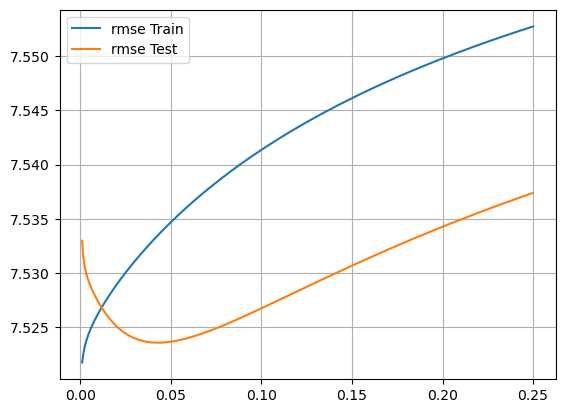

In [9]:
rmse_train = []
rmse_test = []
alpha_rmse = []
alphas=2**np.arange(-2,-10,-.05)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    preds_tr=ridge.predict(X_train)
    preds_te=ridge.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, preds_tr, squared=False))
    rmse_test.append(mean_squared_error(y_test, preds_te, squared=False))
    alpha_rmse.append([alpha,mean_squared_error(y_test, preds_te, squared=False)])    
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test")    
plt.grid()
plt.legend()
plt.show()

#### Best alpha 
For Ridge regression, the best values of alpha obtained were, for lower RMSE and MAE values: is 0.058315 there's when we get the lower rmse of 7.5166

In [10]:
df_rmse_test = pd.DataFrame(alpha_rmse, columns = ['alpha','rmse'])
df_rmse_test.sort_values(by=['rmse'])

,alpha,rmse
51,0.042689,7.523548
50,0.044194,7.523552
52,0.041235,7.523553
49,0.045753,7.523564
53,0.039830,7.523566
...,...,...
4,0.217638,7.535414
3,0.225313,7.535898
2,0.233258,7.536388
1,0.241484,7.536884


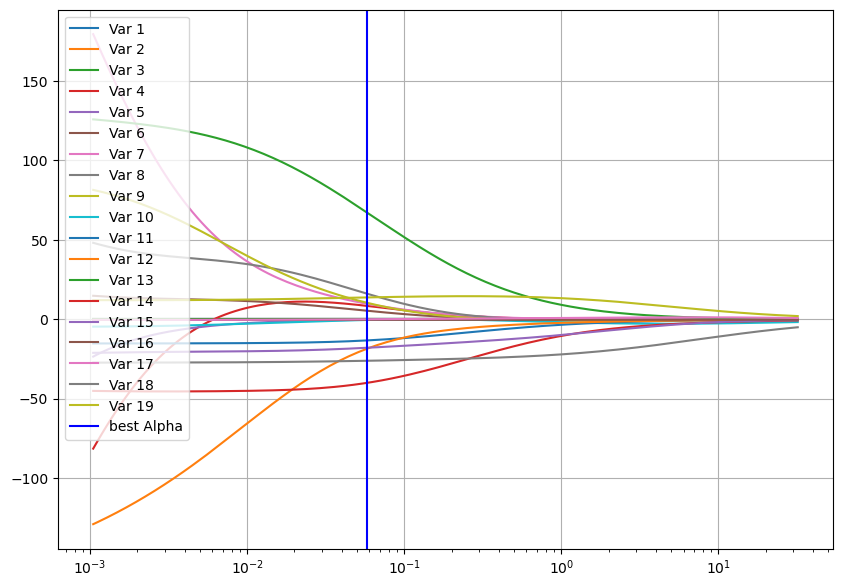

In [11]:
#compute coefficients for many alpha values
coefs=[]
alphas=2**np.arange(5,-10,-.1)
for alpha in alphas:
    ridge= Ridge(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    coefs.append(ridge.coef_)
coefs=np.array(coefs)
#plot results
N,M=X_train.shape
plt.figure(figsize=(10,7))
for i in range(M):
    plt.plot(alphas, coefs[:,i], label="Var %d" % (i+1))
plt.axvline(x = 0.058315, color = 'b', label = 'best Alpha')
plt.xscale("log")
plt.legend()
plt.grid()
plt.show()

In [12]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = Ridge(alpha=0.058315, max_iter=100000)
#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
preds = cross_val_predict(model, X_test,y_test, cv=cv, n_jobs=-1)
printRegStatistics(y_test,preds)

The RVE is:  0.1336274623033229
The rmse is:  7.533432383346362
The Correlation Score is is: 0.3656 (p-value=2.130408e-62)

The Mean Absolute Error is:  6.368294440078424


### 1.2.3 Lasso
For this case smaller alphas get better statistics 

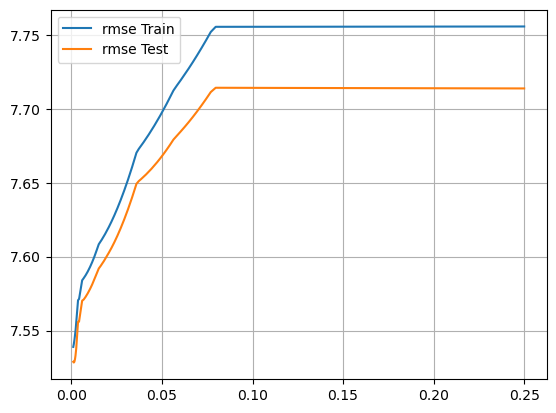

In [13]:
rmse_train = []
rmse_test = []
alphas=2**np.arange(-2,-10,-.05)
for alpha in alphas:
    L = Lasso(alpha=alpha, max_iter=100000).fit(X_train, y_train)
    preds_tr=L.predict(X_train)
    preds_te=L.predict(X_test)
    rmse_train.append(mean_squared_error(y_train, preds_tr, squared=False))
    rmse_test.append(mean_squared_error(y_test, preds_te, squared=False))    
plt.plot(alphas, rmse_train, label="rmse Train")    
plt.plot(alphas, rmse_test, label="rmse Test")    
plt.grid()
plt.legend()
plt.show()

In [14]:
L = Lasso(alpha=0.01, max_iter=9999999).fit(X_train, y_train)
print("The bias is: ",  L.intercept_)
print("The other parameters are: ")
for i, beta in enumerate(L.coef_):
    print("\t B%02d -> %9.3f"% (i+1, beta))    
preds=L.predict(X_test)
printRegStatistics(y_test, preds)

The bias is:  27.289334721891752
The other parameters are: 
	 B01 ->     0.204
	 B02 ->    -0.000
	 B03 ->     0.013
	 B04 ->    -0.000
	 B05 ->    -0.000
	 B06 ->    -0.000
	 B07 ->    -0.000
	 B08 ->    -0.000
	 B09 ->    -0.000
	 B10 ->    -3.675
	 B11 ->    -0.000
	 B12 ->    -0.000
	 B13 ->     0.000
	 B14 ->    -0.000
	 B15 ->    -4.732
	 B16 ->    -0.392
	 B17 ->     0.000
	 B18 ->   -20.308
	 B19 ->    11.451
The RVE is:  0.1245582917985274
The rmse is:  7.577487023864207
The Correlation Score is is: 0.3530 (p-value=5.492866e-58)

The Mean Absolute Error is:  6.4412750218377255


In [15]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#build multiple linear regression model
model = Lasso(alpha=0.01, max_iter=100000)
#use k-fold CV to evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
preds = cross_val_predict(model, X_test,y_test, cv=cv, n_jobs=-1)
printRegStatistics(y_test, preds)

The RVE is:  0.12350958191769512
The rmse is:  7.577293992225079
The Correlation Score is is: 0.3515 (p-value=1.777633e-57)

The Mean Absolute Error is:  6.434970999926388


This Regression model has indeed better statistical results with smaller values of alpha. This fact can also point out that linear regression would be better. On the other hand for larger values of alpha the actual training error can be larger than the testing error.

### 1.3 Model Selection

The model chosen was the Decision Tree Regressor as  it presents a higher value of RVE, closer to 1 a lower RMSE and MAE values and a higher correlation in comparison with the remaining values (refer to table 1).

Validation through IVS was performed for Decision Tree Regressor with max depth = 13 and min sample leaf = 3

In [16]:
model = DecisionTreeRegressor(max_depth=13, min_samples_leaf=3)
model.fit(X_train,y_train)
preds = model.predict(X_IVS)

In [17]:
printRegStatistics(y_IVS,preds)

The RVE is:  0.8696025381802259
The rmse is:  2.936438865366063
The Correlation Score is is: 0.9340 (p-value=0.000000e+00)

The Mean Absolute Error is:  1.0966966742387814


After model evaluation, only a validation through IVS was performed for the Decision Tree Regressor, since it was more suitable. For this step, a max depth and min sample leaf equal to 13 and 3, respectively, were selected as it presented the lowest values of RMSE and MAE and a higher value of RVE. After performing the validation through IVS, the following values obtained were: RVE = 0.8745, RMSE = 2.8824, MAE = 1.080 and Pearson correlation = 0.9366. These results support the selection of the Decision Tree regressor model, since it presents a high value of RVE and a positive correlation between truth values and predicted values. Moreover, after the validation, the MAE and RMSE values decreased.

<a id='section3'></a>
## 2. Classifiers

The aim in this objective was to produce the best binary classification model. To accomplish that purpose we have made a split in the total_UPDRS instance, assuming that the values above 40 are positives and the values below 40 are negatives. Doing that we have binarized the variable. We opted to use a Decision Tree Classifier and a Logistic Regression

- Decision Tree Classifier
- Logistic Regression

##### To evaluate classifiers we can use:
- Accuracy
- Precision
- Recall
- F1
- Matthews Correlation

In [18]:
dg = pd.read_csv("parkinsons_updrs.data")

In [19]:
dg['total_UPDRS_bin'] = np.where(dg['total_UPDRS']> 40.0, 1, 0)

In [20]:
X=dg.drop(columns=["motor_UPDRS","subject#","total_UPDRS","total_UPDRS_bin"])
y=dg['total_UPDRS_bin']

In [21]:
X_train, X_test, ybin_train, ybin_test = train_test_split(X, y, test_size=0.33, random_state=22)
X_train, X_IVS, ybin_train, ybin_IVS = train_test_split(X_train, ybin_train, test_size=0.33, random_state=22)

### 2.1 Decision Tree Classifier

Decision trees are a supervised learning algorithm. They are simple to understand and to interpret, however it is hard to build the perfect decision tree classifier and they overfit easily.
As soon as we binarized the data, we split once again in train and test sets, in this case we have removed the new feature created called total_UPDRS_bin, which stands for the binarized variable made out of the total_UPDRS following the criteria described above.
In order to figure out the best hyperparameters to apply to the model we did a for loop to try different values for both the max depth and the minimum samples leaf.
Eventually we needed to do an IVS (independent validation set). Our main concern was not to repeat the process, regardless of the results obtained, otherwise it wouldn't simulate real world data

In [22]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)        
table = []
for i in range(12,20):
    for j in range(2,10):
        model = DecisionTreeClassifier(max_depth=i, min_samples_leaf=j)      
#use k-fold CV to evaluate model
        scores = cross_val_score(model, X_train, ybin_train, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
        preds = cross_val_predict(model, X_test, ybin_test, cv=cv, n_jobs=-1)
#get metrics
        acc = accuracy_score(ybin_test, preds)
        precision = precision_score(ybin_test, preds)
        recall = recall_score(ybin_test, preds)
        f1= f1_score(ybin_test, preds)
        matt_corr = matthews_corrcoef(ybin_test, preds)
        table.append([i,j,acc,precision, recall,f1,matt_corr])

df_table = pd.DataFrame(table, columns = ['max depth','min sample leaf','accuracy','precision','recall','f1','matthew corr'])
df_table.sort_values(by=['recall'], ascending=False)

,max depth,min sample leaf,accuracy,precision,recall,f1,matthew corr
32,16,2,0.966478,0.919614,0.877301,0.897959,0.878266
49,18,3,0.959773,0.882716,0.877301,0.880000,0.855843
16,14,2,0.964415,0.910543,0.874233,0.892019,0.870985
57,19,3,0.961320,0.893417,0.874233,0.883721,0.860599
56,19,2,0.963383,0.907348,0.871166,0.888889,0.867237
...,...,...,...,...,...,...,...
35,16,5,0.953584,0.873418,0.846626,0.859813,0.832154
43,17,5,0.954616,0.878981,0.846626,0.862500,0.835545
27,15,5,0.952553,0.870253,0.843558,0.856698,0.828420
28,15,6,0.949974,0.856698,0.843558,0.850077,0.820093


In [23]:
#Print the Confusion Matrix
pd.DataFrame(confusion_matrix(ybin_test, preds))

,0,1
0,1575,38
1,44,282


The sweet spot for the hyperparameters was found with a max depth around 15 and a minimum sample per leaf of 2.

In [24]:
#Independent Validation Set (IVS)
model = DecisionTreeClassifier(max_depth=15, min_samples_leaf=2).fit(X_train, ybin_train)
preds = model.predict(X_IVS)

In [25]:
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))
printClassResults(ybin_IVS,preds)

The Accuracy is:  0.9738
The Precision is:  0.9493
The Recall is:  0.8996
The F1 score is:  0.9238
The Matthews correlation coefficient is:  0.9085

This is the Confusion Matrix
      0    1
0  1059   11
1    23  206


### 2.2 Logistic Regression

For logistic regression we tried to do a 10-fold cross validation to evaluate this model, but failed to make good predictions, perhaps due to the fact that our dependent variable is significantly unbalanced or any other factor beyond our comprehension. The predictions tended to be prominently for the negatives in a ratio too far apart from the ratio on the test set thus leading to very bad statistics beyond accuracy, for obvious reasons.

In [26]:
df = pd.read_csv("parkinsons_updrs.data")
df = df.drop(columns = ['subject#'])
df_binary = pd.cut(df['total_UPDRS'],bins=[0,40,99],labels=[0,1])
df.insert(5, 'total_UPDRS_bin', df_binary)
df = df.drop(columns = ['motor_UPDRS','total_UPDRS'])
X = df.drop(columns = ['total_UPDRS_bin'])
y = df['total_UPDRS_bin']

In [27]:
def counter(y):
    zero = 0
    um = 0
    for i in y:
        if i == 0:
            zero += 1
        elif i == 1:
            um += 1
    print(um,'positives',zero,'negatives') 
counter(y)

1006 positives 4869 negatives


In [28]:
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
mdl= LogisticRegression(random_state=0).fit(X_train, ybin_train)
preds = mdl.predict(X_test)
counter(preds)
printClassResults(ybin_test, preds)

19 positives 1920 negatives
The Accuracy is:  0.8324
The Precision is:  0.5263
The Recall is:  0.0307
The F1 score is:  0.0580
The Matthews correlation coefficient is:  0.0953

This is the Confusion Matrix
      0   1
0  1604   9
1   316  10
